# <center>Introduction to Data Science</center> 
### <center>Regression Dataset 2</center>
### <center>House Prices</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
There is always a supply and demand in the housing sector and predicting the price of the house at the right amount is very crucial. If the price of the house is stated low than the market value, people will tend to lose the gain they could have made. Similary, if a house is priced high, there is less likely chance of selling the house or getting any buyer. Thus, pricing the house correctly is very important. 

#### Objective
**Predict the price of the house based on the most important feature**

#### About the Dataset
The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. 

The dataset was obtained from [Kaggle](https://www.kaggle.com/swathiachath/kc-housesales-data)

The dataset contains 21 fields out of which the first field is an id field and the second field is the price of houses being sold. The description of each field is as follows: <br/>
1. **id** : ID of the house.
2. **date** : Date of the house being sold. 
3. **price** : Price of the house being sold.
4. **bedrooms** : No. of bedrooms in the house. 
5. **bathrooms** : No. of bathrooms in the house.
6. **sqft_living** : The square foot area of the living space of the house. 
7. **sqft_lot** : The square foot area of the entire land. 
8. **floors** : No. of floors in the house.
9. **waterfront** : If a view of the waterfront is present or not. 
10. **view** : Number of views. (1 indicates worn out property and 5 excellent)
11. **condition** : Condition of the house. (Based on King County grading system - 1 poor and 13 excellent)
12. **grade** : Grade of the house. 
13. **sqft_above** : The square foot area apart from the basement. 
14. **sqft_basement** : The square foot area of the basement. 
15. **yr_built** : The year of house built. 
16. **yr_renovated** : The year when house is renovated. 
17. **zipcode** : Zipcode. 
18. **lat** : Latitutde co-ordinates of the house. 
19. **long** : Longitude co-ordinates of the house.  
20. **sqftliving15** : Living room area in 2015.
21. **sqftlot15** : The lot size area in 2015.

In [1]:
# All the required libraries are imported here.
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2

import math

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Describing the size, shape and dimension of the dataset.
house_data = pd.read_csv('house_data.csv') 
print("The total size of the dataset is {} bytes.".format(house_data.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(house_data.shape[0], house_data.shape[1], house_data.shape))
print("The dataset has a {} dimensional structure.".format(house_data.ndim))

The total size of the dataset is 453873 bytes.
There are 21613 number of records and 21 number of fields with a (21613, 21) shape.
The dataset has a 2 dimensional structure.


In [3]:
print("The top 5 records of the dataset are: \n{}".format(house_data.head()))

The top 5 records of the dataset are: 
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built

In [4]:
print(house_data[house_data['id'] == 6021501535])

            id             date     price  bedrooms  bathrooms  sqft_living  \
93  6021501535  20140725T000000  430000.0         3        1.5         1580   
94  6021501535  20141223T000000  700000.0         3        1.5         1580   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
93      5000     1.0           0     0  ...      8        1290            290   
94      5000     1.0           0     0  ...      8        1290            290   

    yr_built  yr_renovated  zipcode     lat     long  sqft_living15  \
93      1939             0    98117  47.687 -122.386           1570   
94      1939             0    98117  47.687 -122.386           1570   

    sqft_lot15  
93        4500  
94        4500  

[2 rows x 21 columns]


Here, is a sample record of a house that was sold in different dates and prices but the data records the house twice. We will remove the duplicates and keep the latest transactions. To do that, we need to find and remove the duplicates. 

We will find the duplicate records based on id, bedrooms, bathrooms, sqft_living, sqft_lot, zipcode, lat and longitude. 

In [5]:
print("There are {} number of duplicate values in the dataset. "
      .format(house_data.duplicated(subset=['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'zipcode', 'lat', 'long']).sum()))

There are 177 number of duplicate values in the dataset. 


In [6]:
print("The list of duplicate values are as follows: \n")
house_data.loc[house_data.duplicated(subset=['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'zipcode', 'lat', 'long'], keep=False), :]

The list of duplicate values are as follows: 



id             date      price  bedrooms  bathrooms  \
93     6021501535  20140725T000000   430000.0         3       1.50   
94     6021501535  20141223T000000   700000.0         3       1.50   
313    4139480200  20140618T000000  1384000.0         4       3.25   
314    4139480200  20141209T000000  1400000.0         4       3.25   
324    7520000520  20140905T000000   232000.0         2       1.00   
...           ...              ...        ...       ...        ...   
20670  8564860270  20150330T000000   502000.0         4       2.50   
20779  6300000226  20140626T000000   240000.0         4       1.00   
20780  6300000226  20150504T000000   380000.0         4       1.00   
21580  7853420110  20141003T000000   594866.0         3       3.00   
21581  7853420110  20150504T000000   625000.0         3       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
93            1580      5000     1.0           0     0  ...      8   
94            1580      5000     1.0           0     0  ...      8   
313           4290     12103     1.0           0     3  ...     11   
314           4290     12103     1.0           0     3  ...     11   
324           1240     12092     1.0           0     0  ...      6   
...            ...       ...     ...         ...   ...  ...    ...   
20670         2680      5539     2.0           0     0  ...      8   
20779         1200      2171     1.5           0     0  ...      7   
20780         1200      2171     1.5           0     0  ...      7   
21580         2780      6000     2.0           0     0  ...      9   
21581         2780      6000     2.0           0     0  ...      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
93           1290            290      1939             0    98117  47.6870   
94           1290            290      1939             0    98117  47.6870   
313          2690           1600      1997             0    98006  47.5503   
314          2690           1600      1997             0    98006  47.5503   
324           960            280      1922          1984    98146  47.4957   
...           ...            ...       ...           ...      ...      ...   
20670        2680              0      2013             0    98045  47.4759   
20779        1200              0      1933             0    98133  47.7076   
20780        1200              0      1933             0    98133  47.7076   
21580        2780              0      2013             0    98065  47.5184   
21581        2780              0      2013             0    98065  47.5184   

          long  sqft_living15  sqft_lot15  
93    -122.386           1570        4500  
94    -122.386           1570        4500  
313   -122.102           3860       11244  
314   -122.102           3860       11244  
324   -122.352           1820        7460  
...        ...            ...         ...  
20670 -121.734           2680        5992  
20779 -122.342           1130        1598  
20780 -122.342           1130        1598  
21580 -121.886           2850        6000  
21581 -121.886           2850        6000  

[353 rows x 21 columns]

In [7]:
#Now deleting the first occurence of the duplicate values. 
house_data = house_data.drop_duplicates(subset=['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'zipcode', 'lat', 'long'], keep='last')

In [8]:
#Printing the data types
print("The datatype of the dataset are: \n{}".format(house_data.dtypes))

The datatype of the dataset are: 
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We can see that the date value is of type object. Since, we know date will not play much part in predicting the price of the house, we can either drop the field or leave it as it is. 

In [9]:
#Statistical description of the data
print(house_data.describe().T)

                 count          mean           std           min  \
id             21436.0  4.580765e+09  2.876590e+09  1.000102e+06   
price          21436.0  5.416500e+05  3.673149e+05  7.500000e+04   
bedrooms       21436.0  3.371571e+00  9.292047e-01  0.000000e+00   
bathrooms      21436.0  2.117349e+00  7.699128e-01  0.000000e+00   
sqft_living    21436.0  2.082705e+03  9.191465e+02  2.900000e+02   
sqft_lot       21436.0  1.513564e+04  4.153862e+04  5.200000e+02   
floors         21436.0  1.496198e+00  5.403884e-01  1.000000e+00   
waterfront     21436.0  7.604031e-03  8.687095e-02  0.000000e+00   
view           21436.0  2.351185e-01  7.670921e-01  0.000000e+00   
condition      21436.0  3.410384e+00  6.502354e-01  1.000000e+00   
grade          21436.0  7.661737e+00  1.174256e+00  1.000000e+00   
sqft_above     21436.0  1.790960e+03  8.290265e+02  2.900000e+02   
sqft_basement  21436.0  2.917445e+02  4.427820e+02  0.000000e+00   
yr_built       21436.0  1.971098e+03  2.938528e+

Now, since the id field is unique we can create that as an index column as the field does not make any contribution on linear regression or classification. 

In [10]:
house_data = house_data.set_index('id')

print('Now our dataframe with the updated index looks like : \n{}'.format(house_data.head()))

Now our dataframe with the updated index looks like : 
                       date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   
5631500400     10000     1.0           0     0          3      6         770   
2487200875      500

### Statistical Numerical and Graphical Summaries

The scatter matrix can be constructed to display how the data are distributed across the dataset.



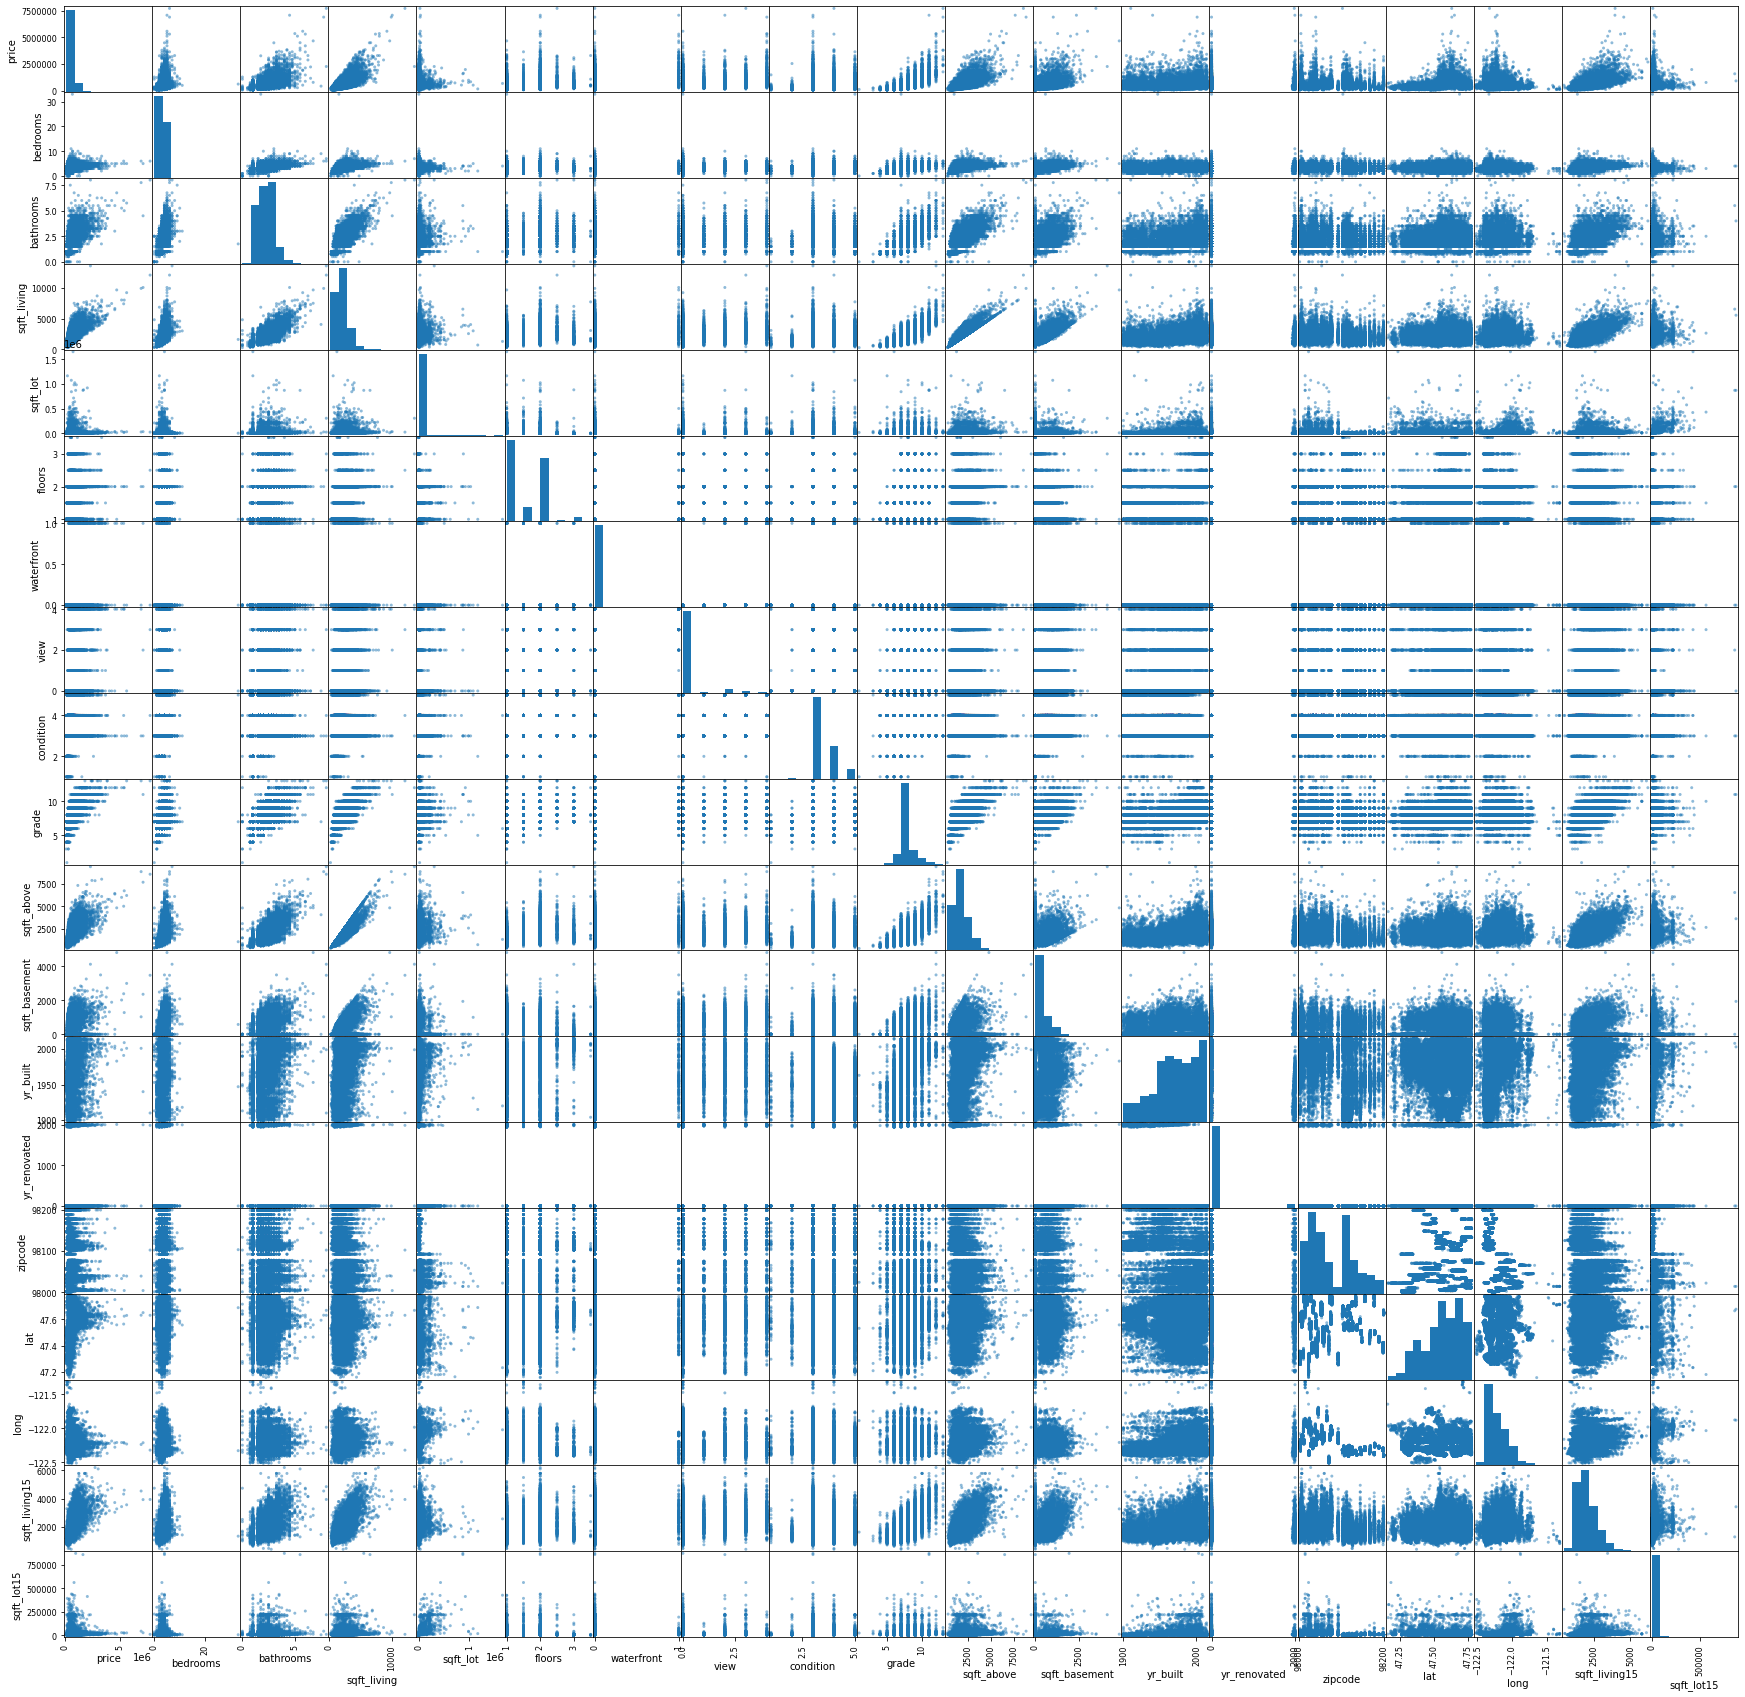

In [11]:
print("The scatter matrix can be constructed to display how the data are distributed across the dataset.\n")

_scatter_matrix_data = scatter_matrix(house_data, figsize=(30,30), diagonal='hist')

In [12]:
print("From the above graph while considering the histograms diagonally we can see that most of the fields are right skewed. \
    \nWhereas from the scatter plot we can see there are few outliers in the dataset. \
    \nBelow is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. \n")

#Removing the date field from the dataset.
house_data = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront'
                        , 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
for data_keys in house_data.keys():
      skewness = house_data[data_keys].skew()
      if skewness > 0: 
          print(data_keys, "is Right Skewed")
      elif skewness <0:
          print(data_keys, "is Left Skewed")
      else:
          print(data_keys, "is Normally Distributed")

From the above graph while considering the histograms diagonally we can see that most of the fields are right skewed.     
Whereas from the scatter plot we can see there are few outliers in the dataset.     
Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. 

price is Right Skewed
bedrooms is Right Skewed
bathrooms is Right Skewed
sqft_living is Right Skewed
sqft_lot is Right Skewed
floors is Right Skewed
waterfront is Right Skewed
view is Right Skewed
condition is Right Skewed
grade is Right Skewed
sqft_above is Right Skewed
sqft_basement is Right Skewed
yr_built is Left Skewed
yr_renovated is Right Skewed
zipcode is Right Skewed
lat is Left Skewed
long is Right Skewed
sqft_living15 is Right Skewed
sqft_lot15 is Right Skewed


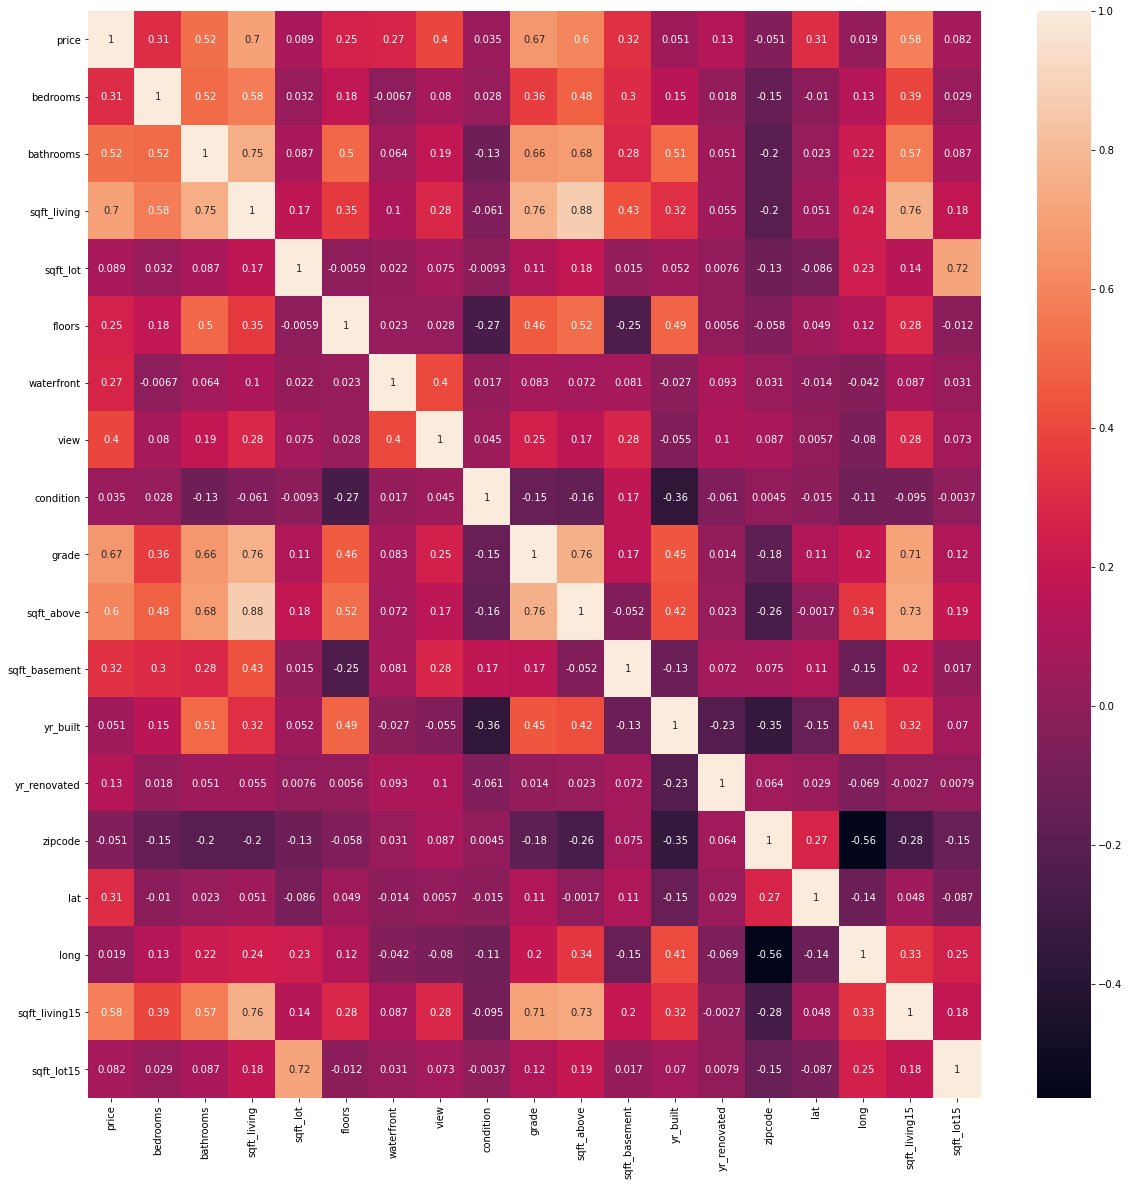

In [13]:
correlations = house_data.corr()
plt.figure(figsize=(20,20))
heatmap_ = sns.heatmap(correlations, annot=True)

The heatmap shows the correlation between each variables. Since, we are trying to find a variable that is strongly related with the price of the house, we can see that sqft_living field is the most strongly correlated with the price of the house. After sqft_living, the grade and the sqft_above are more strongly related to the price. 

We will choose sqft_living to predict the price of the house. With this finding we can also say that the larger the sqft of the house the higher the price of the house is to be estimated. Which is true, but as all association does not imply causation, we cannot neglect other factors such as sqft_above, the grade of the house, number of bathrooms and bedrooms and other fiels, as they could play vital role in determining the prices. 

We will only find the correlation between the price of the house and the sqft_living of the house in this dataset.

### Algorithm Implementation and Statistical Tests

In [14]:
#Linear Regression between sqft_living and price.
sqft_data = house_data[['sqft_living']]
price_data = house_data[['price']]

X_train, X_test, y_train, y_test = train_test_split(sqft_data, price_data, test_size=0.25)

# scaler = MinMaxScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

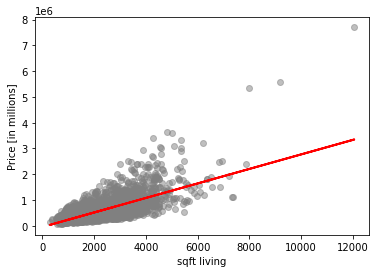

In [15]:
#Plotting the points and the line of best fits. Here the scatter plot is plotted between sqft_living and price of the house and the best line of fit is created by plotting a line 
#between the predicted value and the explanatory variable values.
plt.scatter(X_test, y_test, c="grey", alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.ylabel('Price [in millions]')
plt.xlabel('sqft living')
plt.show()

In [16]:
print("Thus, the line of best fit for the above can be found using : \n y = {} + {} x. \n".format(regression.intercept_, regression.coef_[0]))

mse = mean_squared_error(y_test, y_pred) 
print("Where the Slope is {} and the y intercept is {} \n\
with mean squared error of {} and \nroot mean squared error of {}"
      .format(regression.coef_[0], regression.intercept_, mse, math.sqrt(mse)))

Thus, the line of best fit for the above can be found using : 
 y = [-44025.93903058] + [281.47743554] x. 

Where the Slope is [281.47743554] and the y intercept is [-44025.93903058] 
with mean squared error of 69880439595.75397 and 
root mean squared error of 264349.08661796805


In [17]:
pearson_coef, p_value = stats.pearsonr(sqft_data['sqft_living'], price_data['price'])
print("The Pearson coefficient of the variables is r = {}".format(pearson_coef))

The Pearson coefficient of the variables is r = 0.7014132305241632


Thus, from the above calculation we can see that with increase in 1 square foot, there is an increase of 280.316 in price. 

The correlation between the sqft_living and price creates a strong positive pattern. The coefficient correlation between the variables is 0.701. 

Using the above equation we can predict price of houses by providing the sqft_living value.

In [18]:
print("Similarly the coefficient of variation is : {}%".format(regression.score(X_test, y_test)*100))

Similarly the coefficient of variation is : 47.90313715882537%


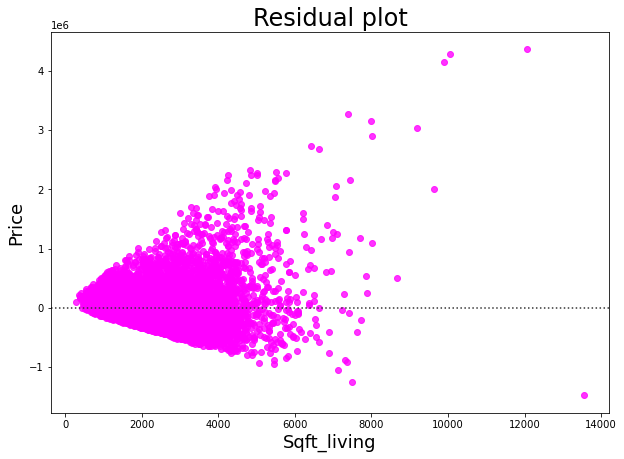

In [19]:
fig = plt.figure(figsize = (10, 7))
sns.residplot(sqft_data['sqft_living'], price_data['price'], color='magenta')

# title and labels
plt.title('Residual plot', size=24)
plt.xlabel('Sqft_living', size=18)
plt.ylabel('Price', size=18);

The residual plot created above looks like it leans more toward Homoscedastic as the residual plot shows homogeneous spread out of the plot and are uniformly distributed about x-axis. 

In [20]:
print('To predict a price of a house with 2570 of sqft_living, we can use the above equation. \nThe predicted price of the house would be:\n')
x = 2570
print('The equation is given by : y = {} + ({}) * {}'.format(regression.intercept_, (regression.coef_[0]), x))
print('y = {}\n'.format(regression.intercept_ + (regression.coef_[0]) * x))
print("Thus the price of the house can be put up as : ${}".format(regression.intercept_ + (regression.coef_[0]) * x))

To predict a price of a house with 2570 of sqft_living, we can use the above equation. 
The predicted price of the house would be:

The equation is given by : y = [-44025.93903058] + ([281.47743554]) * 2570
y = [679371.07031926]

Thus the price of the house can be put up as : $[679371.07031926]


### Performance Improvement

From the above we can see that we are able to obtain coefficient of variation of 48%. Let us see if we could find better score using the multi-linear regression. 

In [21]:
#Considering most of the features to find the top features that helps to determine the price.
#Removing few features as the algorithm does not consider negative numbers.
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition'
                   , 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']]
y = house_data['price']

select_k_best = SelectKBest(score_func=chi2, k=10)

best_result = select_k_best.fit(X, y)

scores = pd.DataFrame(best_result.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Field', 'Score']

print(feature_scores.nlargest(10, 'Score'))

            Field         Score
3        sqft_lot  3.936220e+08
12   yr_renovated  9.228790e+06
2     sqft_living  5.450062e+06
9      sqft_above  4.398121e+06
10  sqft_basement  4.374270e+06
6            view  1.917994e+04
5      waterfront  8.116336e+03
1       bathrooms  2.691092e+03
8           grade  2.360518e+03
11       yr_built  2.087580e+03


In [25]:
# Defining the dataset for Logistic Regression.
predictor_data = house_data[['sqft_lot', 'yr_renovated', 'sqft_living']]
target_data = house_data['price']

X_train, X_test, y_train, y_test = train_test_split(predictor_data, target_data)

# Data normalization  
scaler = MinMaxScaler()
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Defining models and parameters for our grid search 
regression = LogisticRegression(n_jobs=-1)
solvers = ['newton-cg', 'lbfgs']
c = [0.01, 0.1]
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# c = [0.01, 0.1]

param_grid = dict(solver=solvers,C=c)
# Creating a Repeated Stratifier KFold with 10 splits and 2 repeats for the cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Parameterizing the grid search
grid_search = GridSearchCV(estimator=regression, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

The result is obtained as below. The result is copied after executing the above code in Google Colab: 

Best: 0.008483 using {'C': 0.1, 'solver': 'newton-cg'} <br/>
0.008205 (0.000282) with: {'C': 0.01, 'solver': 'newton-cg'} <br/>
0.008205 (0.000282) with: {'C': 0.01, 'solver': 'lbfgs'} <br/>
0.008483 (0.000462) with: {'C': 0.1, 'solver': 'newton-cg'} <br/>
0.008483 (0.000462) with: {'C': 0.1, 'solver': 'lbfgs'} <br/>

In [26]:
# Defining the dataset for Logistic Regression.
predictor_data = house_data[['sqft_lot', 'yr_renovated', 'sqft_living']]
target_data = house_data['price']

X_train, X_test, y_train, y_test = train_test_split(predictor_data, target_data)

# Data normalization  
scaler = MinMaxScaler()
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Defining models and parameters for our grid search 
regression = LogisticRegression(n_jobs=-1, C=0.1, solver='newton-cg')
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

In [28]:
print("Thus, the line of best fit for the above can be found using : \n y = {} + {} x. \n".format(regression.intercept_, regression.coef_[0]))

mse = mean_squared_error(y_test, y_pred) 
print("Where the Slope is {} and the y intercept is {} \n\
with mean squared error of {} and \nroot mean squared error of {}"
      .format(regression.coef_[0], regression.intercept_, mse, math.sqrt(mse)))

Thus, the line of best fit for the above can be found using : 
 y = [-0.70172825 -0.70182603 -0.70146252 ... -0.70921109 -0.71114961
 -0.71775034] + [ 0.00170372 -0.00426096 -0.01067159] x. 

Where the Slope is [ 0.00170372 -0.00426096 -0.01067159] and the y intercept is [-0.70172825 -0.70182603 -0.70146252 ... -0.70921109 -0.71114961
 -0.71775034] 
with mean squared error of 146476276489.88504 and 
root mean squared error of 382722.19231432746


In [48]:
print("Similarly the coefficient of variation is : {}%".format(regression.score(X_test, y_test)*100))

Similarly the coefficient of variation is : 0.6157865273371897%


### Conclusion

Thus we can conclude that the price of the house increases with the increase in the square foot of the living area. We saw both the variables presented a positive strong correlation. With the line of best fit that was obtained through the linear regression, we are able to predict the price of a house with any given square foot. 

However, there are some other lurking variables due to which the coefficient of variation between the price and the sqft of living does not give us a high accuracy. Other variables such as number of bedrooms and bathrooms and the grade of the house are also important in determining the price of the house. 